In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import cv2
import numpy as np
import os
from imutils import paths

In [4]:
pip install opencv-python

     -------------------------------------- 35.6/35.6 MB 439.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=08aefbe09d10621203c5b4e474c2303b1b9b1408d6e44221bc03e9daaa33ab67
  Stored in directory: c:\users\nisha\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [3]:
images = "C:\\Users\\nisha\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\train"

In [4]:
folders = os.listdir(images)
print(folders)

['Normal', 'Osteoarthritis']


In [5]:
image_data= []
labels = []

In [6]:
label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

In [7]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [8]:
print(len(image_data),len(labels))

2350 2350


In [9]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [10]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350,)


In [12]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350, 2)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# Data Augmentation
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [16]:
#CNN MODEL
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="parkinsons_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        3

In [18]:
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 75,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/75
67/67 [==============================] - ETA: 0s - loss: 3.1985 - accuracy: 0.5929
Epoch 00001: val_loss improved from inf to 1.74572, saving model to parkinsons_detection.hdf5
67/67 [==============================] - 161s 2s/step - loss: 3.1985 - accuracy: 0.5929 - val_loss: 1.7457 - val_accuracy: 1.0000
Epoch 2/75
67/67 [==============================] - ETA: 0s - loss: 1.8850 - accuracy: 0.6175
Epoch 00002: val_loss improved from 1.74572 to 1.27209, saving model to parkinsons_detection.hdf5
67/67 [==============================] - 177s 3s/step - loss: 1.8850 - accuracy: 0.6175 - val_loss: 1.2721 - val_accuracy: 1.0000
Epoch 3/75
67/67 [==============================] - ETA: 0s - loss: 1.7161 - accuracy: 0.6118
Epoch 00003: val_loss did not improve from 1.27209
67/67 [==============================] - 186s 3s/step - loss: 1.7161 - accuracy: 0.6118 - val_loss: 1.3552 - val_accuracy: 1.0000
Epoch 4/75
67/67 [==============================] - ETA: 0s - loss: 1.5724 - accuracy

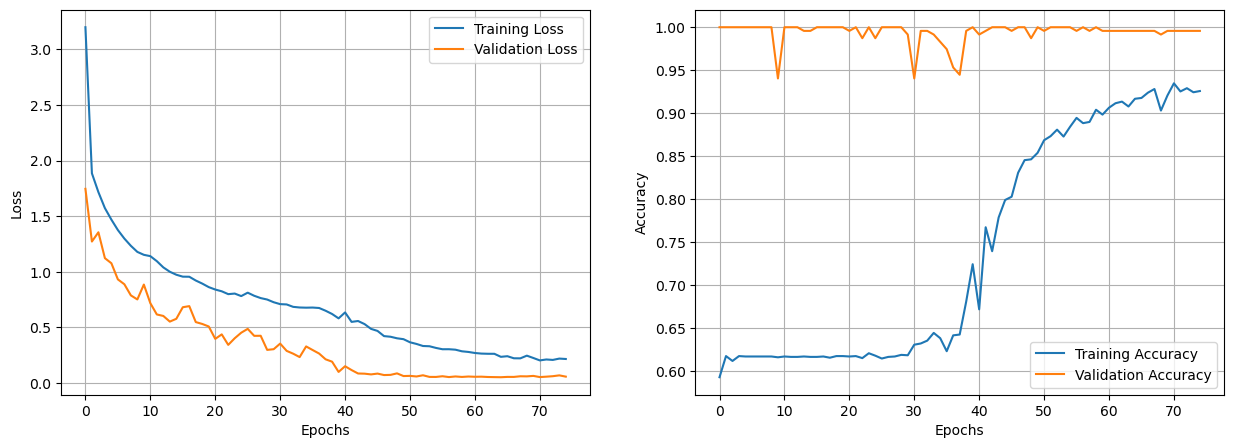

In [20]:
from matplotlib import pyplot as plt
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("Figure 2.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("figure 3.jpg")

In [24]:
#TESTING THE cnn MODEL'S PERFORMANCE
test_images = "C:\\Users\\nisha\\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\valid"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)

['Normal', 'Osteoarthritis']
(641, 512, 512, 3) (641, 2)


In [25]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 10s 455ms/step - loss: 0.3966 - accuracy: 0.8768


[0.3965607285499573, 0.8767550587654114]

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [28]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       210
           1       0.86      0.98      0.91       431

    accuracy                           0.88       641
   macro avg       0.90      0.82      0.85       641
weighted avg       0.88      0.88      0.87       641



In [29]:
print(confusion_matrix(test_labels, pred))

[[140  70]
 [  9 422]]


Normalized Confusion Matrix: 
[[0.67 0.33]
 [0.02 0.98]]


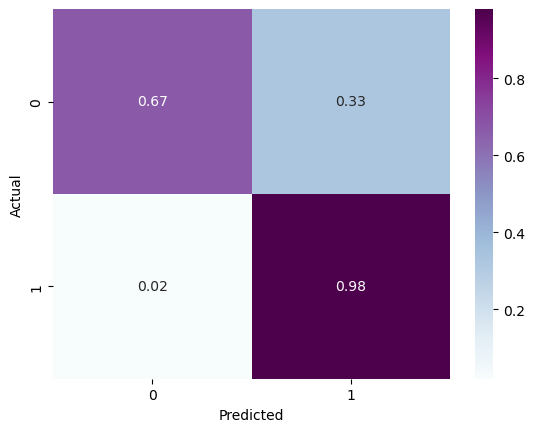

In [30]:
# Normalized Confusion Matrix
import numpy as np
import seaborn as sns
print("Normalized Confusion Matrix: ")
cm_normalized = np.round(confusion_matrix(test_labels, pred)/np.sum(confusion_matrix(test_labels, pred), axis = 1).reshape(-1, 1),2)
print(cm_normalized)
sns.heatmap(cm_normalized, annot = True, cmap = "BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
sensitivity1 = confusion_matrix(test_labels, pred)[0,0]/(confusion_matrix(test_labels, pred)[0,0]+confusion_matrix(test_labels, pred)[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.6666666666666666


In [32]:
specificity1 = confusion_matrix(test_labels, pred)[1,1]/(confusion_matrix(test_labels, pred)[1,0]+confusion_matrix(test_labels, pred)[1,1])
print('Specificity : ', specificity1)

Specificity :  0.9791183294663574


In [34]:
# predict probabilities
pred_prob1 = model.predict_proba(x_test)

Instructions for updating:
Please use `model.predict()` instead.


In [1]:
from sklearn.metrics import roc_curve, auc

history = model.fit(x_train, y_train, validation_data=(
        x_test, y_test), epochs= 25, batch_size= 32, verbose=1)

y_pred = model.predict(x_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_score)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)


NameError: name 'model' is not defined